## EDA of Backorder Prediction

### Problem Statement: 
    A backorder is the order which could not be fulfilled by the company. Due to high demand of a product, the company was not able to keep up with the delivery of the order. The backordering can lead to upsetting customer as they couldn't get what they ordered and the loyalty will decrease.
    
    Also, company cannot overstock every product in their inventory to avoid such situation.
    
    There has to be a way for the company to know for which products they can face this problem.
    
    So, the company has shared a data file with different input features for each product and it hopes to find a pattern inside this data which can give them some insight.
    
    The data file contains the historical data for some weeks prior to the week we are trying to predict. 
    
    The data has 23 columns including 22 features and one target column.
    
    To model and predict the target, we’ll use the features columns, which are:
    

    * sku(Stock Keeping Unit)– 		 	Random ID for the product
    * national_inv –   	Current inventory level for the part
    * lead_time – 	 	Transit time for product (if available)
    * in_transit_qty – 	Amount of product in transit from source
    * forecast_3_month – 	Forecast sales for the next 3 months
    * forecast_6_month – 	Forecast sales for the next 6 months
    * forecast_9_month – 	Forecast sales for the next 9 months
    * sales_1_month – 	Sales quantity for the prior 1 month time period
    * sales_3_month – 	Sales quantity for the prior 3 month time period
    * sales_6_month – 	Sales quantity for the prior 6 month time period
    * sales_9_month – 	Sales quantity for the prior 9 month time period
    * min_bank – 		Minimum recommend amount to stock
    * potential_issue – 	Source issue for part identified
    * pieces_past_due – 	Parts overdue from source
    * perf_6_month_avg – 	Source performance for prior 6 month period
    * perf_12_month_avg – 	Source performance for prior 12 month period
    * local_bo_qty – 		Amount of stock orders overdue
    * deck_risk – 		Part risk flag
    * oe_constraint – 	Part risk flag
    * ppap_risk – 		Part risk flag
    * stop_auto_buy – 	Part risk flag
    * rev_stop – 		Part risk flag
    * went_on_backorder – 	Product actually went on backorder. This is the target value.


In [1]:
# Importing necessary packages
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dictionary of values for representing NaNs as -99, so we also can replace them to NaN
na_other = {'perf_6_month_avg':-99, 'perf_12_month_avg':-99}

In [3]:
# Loading the training and test data
training_data = pd.read_csv("./dataset/Training_Dataset_v2.csv", na_values=na_other)
test_data =  pd.read_csv("./dataset/Test_Dataset_v2.csv", na_values=na_other)

C:\Users\Tarun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Checking number of rows and columns in the train and test dataset
print("Shape of Training Dataset: ", training_data.shape)
print()
print("Shape of Test Dataset: ", test_data.shape)

Shape of Training Dataset:  (1687861, 23)

Shape of Test Dataset:  (242076, 23)


In [5]:
#Checking the dtypes of Columns and non-null values to get some Insights
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1558382 non-null  float64
 15  perf_12_month_avg  1565810 non-n

In [6]:
#Checking the dtypes of Columns and non-null values to get some Insights
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   222974 non-null  float64
 15  perf_12_month_avg  224100 non-null  float64
 16  lo

In [7]:
#Seeing how the data looks like
training_data.head(20)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [8]:
# Some columns are not shown above, so show them here
training_data.loc[0:20,'sales_9_month':'potential_issue']

,sales_9_month,min_bank,potential_issue
0,0.0,0.0,No
1,0.0,0.0,No
2,0.0,0.0,No
3,0.0,1.0,No
4,4.0,2.0,No
5,0.0,0.0,No
6,0.0,4.0,No
7,0.0,0.0,No
8,0.0,0.0,No
9,0.0,0.0,No


In [9]:
#Seeing how the data looks like
test_data.head(20)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
5,3285960,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.37,0.68,0.0,No,No,No,Yes,No,No
6,3286073,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No
7,3286113,28.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
8,3286206,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,Yes,Yes,No,No
9,3286325,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No


In [10]:
# Some columns are not shown above, so show them here
test_data.loc[0:20, 'sales_9_month':'potential_issue']

,sales_9_month,min_bank,potential_issue
0,0.0,1.0,No
1,0.0,1.0,No
2,0.0,0.0,No
3,2.0,0.0,No
4,0.0,0.0,No
5,2.0,0.0,No
6,0.0,0.0,No
7,0.0,0.0,No
8,0.0,0.0,No
9,0.0,0.0,No


In [11]:
training_data.tail(10) # looking at the training data from end

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687851,1373539,-6.0,9.0,36.0,130.0,130.0,130.0,0.0,0.0,54.0,...,0.0,0.03,0.10,42.0,No,No,No,Yes,No,No
1687852,1478683,2.0,8.0,0.0,966.0,966.0,1116.0,47.0,512.0,1361.0,...,0.0,0.84,0.77,46.0,No,No,No,Yes,No,No
1687853,1489920,0.0,2.0,0.0,2071.0,3025.0,3412.0,4.0,764.0,764.0,...,0.0,0.98,0.99,4.0,No,No,No,No,No,Yes
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,...,0.0,0.85,0.90,1.0,No,No,No,Yes,No,No
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,NaN,NaN,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Some columns are not shown above, so showing them here
training_data.loc[:, 'sales_9_month':'potential_issue'].tail(10)

,sales_9_month,min_bank,potential_issue
1687851,57.0,3.0,No
1687852,2060.0,455.0,No
1687853,765.0,657.0,No
1687854,1074.0,111.0,No
1687855,7.0,0.0,No
1687856,8.0,0.0,No
1687857,12.0,0.0,No
1687858,205.0,12.0,No
1687859,20.0,1.0,No
1687860,NaN,NaN,NaN


In [13]:
test_data.tail(10) # looking at the test data from end

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242066,3526983,50.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,Yes,Yes,No,No
242067,3526984,20.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242068,3526985,165.0,NaN,0.0,56.0,180.0,273.0,21.0,86.0,215.0,...,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No
242069,3526986,11.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242070,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Some columns are not shown above, so showing them here
test_data.loc[:, 'sales_9_month':'potential_issue'].tail(10)

,sales_9_month,min_bank,potential_issue
242066,0.0,1.0,No
242067,0.0,1.0,No
242068,314.0,40.0,No
242069,0.0,1.0,No
242070,0.0,1.0,No
242071,0.0,1.0,No
242072,0.0,1.0,No
242073,0.0,1.0,No
242074,88.0,4.0,No
242075,NaN,NaN,NaN


In [15]:
#Checking for null values in training dataset
training_data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg     129479
perf_12_month_avg    122051
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [16]:
# Percentage and Sum of Missing values in each Columns
train_missing_data = pd.DataFrame({'total_missing': training_data.isnull().sum(), 'perc_missing': (training_data.isnull().sum()/training_data.shape[0])*100})
train_missing_data

,total_missing,perc_missing
sku,0,0.000000
national_inv,1,0.000059
lead_time,100894,5.977625
in_transit_qty,1,0.000059
forecast_3_month,1,0.000059
forecast_6_month,1,0.000059
forecast_9_month,1,0.000059
sales_1_month,1,0.000059
sales_3_month,1,0.000059
sales_6_month,1,0.000059


In [17]:
#Checking for null values in test dataset
test_data.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg     19102
perf_12_month_avg    17976
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [18]:
# Percentage and Sum of Missing values in each Columns
test_missing_data = pd.DataFrame({'total_missing': test_data.isnull().sum(), 'perc_missing': (test_data.isnull().sum()/test_data.shape[0])*100})
test_missing_data

,total_missing,perc_missing
sku,0,0.000000
national_inv,1,0.000413
lead_time,14725,6.082800
in_transit_qty,1,0.000413
forecast_3_month,1,0.000413
forecast_6_month,1,0.000413
forecast_9_month,1,0.000413
sales_1_month,1,0.000413
sales_3_month,1,0.000413
sales_6_month,1,0.000413


In [19]:
    # Using descriptive Statistics to find some insight in numeric columns
training_data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.558382e+06,1.565810e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,7.823812e-01,7.769763e-01,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.370141e-01,2.304902e-01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,6.900000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.500000e-01,8.300000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [20]:
# Using descriptive Statistics to find some insight in non-numeric columns
training_data.describe(include=object)

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3275686,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


 * Both train and test dataset has total 23 columns, 15 are floating and 8 are string.
 * There are two dtype of columns , float64 and object.
 * Columns of string type has 2 unique values. As such, these columns should be converted from string to boolean to use with  
   machine learning.
 * 'sku' is stock keeping unit(like product key), randomly generated so we can also use as index or drop it.
 * The 'sku' column containing numbers in all rows except for last row that contains a string.So last row of training and test   
   dataset is not valid entry, we can remove that.
 * 'national_inv', 'perf_6_month_avg' and 'perf_12_month_avg' show negative values.
 * In national_inv, the negative values represent a shop that ordered more stock than is available.
 * -99 are NaNs in 'perf_6_month_avg' and 'perf_12_month_avg' columns, so 'perf_6_month_avg' and 'perf_12_month_avg' have   
   7.890910% and 7.890910% NaN values respectively.
 * 'lead_time' hase 6.082800% NaN values.

In [21]:
# Dropping 'sku' column from train and test dataset
training_data.drop('sku', axis=1, inplace=True)
test_data.drop('sku', axis=1, inplace=True)

In [22]:
# Dropping last row from train and test both beacuse that have invalid data and this is only row 
# that have NaN value in most of columns
training_data=training_data[:-1]
test_data=test_data[:-1]

In [23]:
# Dataset contains two type of data type columns, float64 and object,seprate both in two lists

float_columns = []
object_columns = []
for col, dtype in zip(training_data.columns, training_data.dtypes):
     if dtype == np.float64:
            float_columns.append(col)
            
for col, dtype in zip(training_data.columns, training_data.dtypes):
    if dtype == object:
            object_columns.append(col)

print("Numeric Columns: ")
print(float_columns)
print()
print()
print("Non-Numeric Columns: ")
print(object_columns)
    

Numeric Columns: 
['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


Non-Numeric Columns: 
['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [24]:
# Checking all float columns of training dataset
training_data[float_columns].head(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,NaN,NaN,0.0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0
6,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,NaN,NaN,0.0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
8,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0


In [25]:
# Checking all float columns of test dataset
test_data[float_columns].head(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
1,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.92,0.95,0.0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.78,0.75,0.0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.54,0.71,0.0
5,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.37,0.68,0.0
6,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
7,28.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
8,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [26]:
# Checking all float columns of training dataset from last
training_data[float_columns].tail(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
1687840,-47.0,12.0,49.0,249.0,249.0,249.0,0.0,180.0,187.0,189.0,0.0,0.0,0.78,0.78,47.0
1687841,688.0,4.0,280.0,690.0,1540.0,2190.0,314.0,1042.0,1819.0,2727.0,225.0,0.0,0.91,0.93,10.0
1687842,25.0,8.0,16.0,135.0,180.0,255.0,44.0,98.0,160.0,234.0,51.0,0.0,0.94,0.96,16.0
1687843,-1.0,3.0,18.0,0.0,0.0,0.0,5.0,8.0,8.0,8.0,0.0,0.0,0.87,0.72,1.0
1687844,488.0,2.0,201.0,720.0,1400.0,2160.0,248.0,665.0,1265.0,1733.0,189.0,0.0,0.93,0.96,1.0
1687845,4113.0,4.0,2015.0,2871.0,6200.0,7909.0,944.0,3388.0,9471.0,14695.0,796.0,0.0,0.73,0.78,550.0
1687846,-3.0,12.0,0.0,128.0,179.0,230.0,97.0,181.0,296.0,500.0,0.0,0.0,0.00,0.01,3.0
1687847,-206.0,NaN,0.0,760.0,1145.0,1453.0,114.0,853.0,1764.0,2706.0,0.0,0.0,NaN,NaN,206.0
1687848,39.0,8.0,5.0,88.0,119.0,140.0,17.0,57.0,113.0,202.0,25.0,0.0,0.69,0.69,9.0
1687849,2707.0,2.0,830.0,9000.0,18000.0,26500.0,2011.0,6998.0,15074.0,23164.0,1946.0,0.0,0.97,0.98,20.0


In [27]:
# Checking all float columns of training dataset from last
test_data[float_columns].tail(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
242055,14.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.78,0.0
242056,61.0,4.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,43.0,3.0,0.0,0.73,0.78,0.0
242057,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.78,0.0
242058,106.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.78,0.0
242059,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.78,0.0
242060,5.0,4.0,6.0,0.0,2.0,4.0,2.0,13.0,27.0,36.0,2.0,0.0,0.73,0.78,0.0
242061,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.48,0.48,0.0
242062,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.48,0.48,0.0
242063,15.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.48,0.48,0.0
242064,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.48,0.48,0.0


In [28]:
# Checking all object columns of training dataset
training_data[object_columns].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,Yes,No,No
1,No,No,No,No,Yes,No,No
2,No,Yes,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
4,No,Yes,No,No,Yes,No,No


In [29]:
# Checking all object columns of test dataset
test_data[object_columns].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,Yes,No,No,Yes,No,No
1,No,No,No,Yes,No,No,No
2,No,No,No,No,Yes,No,No
3,No,No,No,Yes,Yes,No,No
4,No,No,No,No,Yes,No,No


In [30]:
# Checking for all unique values of categorical columns except 'sku' of training dataset
print("Column","         ", "Unique Values")

for i in object_columns:
    print(i,":", "         ", training_data[i].unique())
    print()

# training_data.deck_risk.unique()

Column           Unique Values
potential_issue :           ['No' 'Yes']

deck_risk :           ['No' 'Yes']

oe_constraint :           ['No' 'Yes']

ppap_risk :           ['No' 'Yes']

stop_auto_buy :           ['Yes' 'No']

rev_stop :           ['No' 'Yes']

went_on_backorder :           ['No' 'Yes']



In [31]:
# Checking for all unique values of categorical columns except 'sku' of test dataset
print("Column","         ", "Unique Values")
print()
for i in object_columns:
    print(i,":", "         ", test_data[i].unique())
    print()

# training_data.deck_risk.unique()

Column           Unique Values

potential_issue :           ['No' 'Yes']

deck_risk :           ['Yes' 'No']

oe_constraint :           ['No' 'Yes']

ppap_risk :           ['No' 'Yes']

stop_auto_buy :           ['Yes' 'No']

rev_stop :           ['No' 'Yes']

went_on_backorder :           ['No' 'Yes']



 * From above all categorical columns are binary means have 'Yes' or 'No' values. We have to convert them to numeric type

In [32]:
# Changing all categorical columns from string to numerical
for col_name in object_columns:
    training_data[col_name] = training_data[col_name].map({'No':0, 'Yes':1})
    test_data[col_name] = test_data[col_name].map({'No':0, 'Yes':1})

In [33]:
# Checking for all categorical columns of train dataset
training_data[object_columns].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


In [34]:
# Checking for all categorical columns fo test dataset
test_data[object_columns].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,1,0,0
4,0,0,0,0,1,0,0


In [35]:
# Checking converted dtype of categorical columns
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  int64  
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1558382 non-null  float64
 14  perf_12_month_avg  1565810 non-null  float64
 15  local_bo_qty       1687860 non-n

In [36]:
training_data.tail(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687840,-47.0,12.0,49.0,249.0,249.0,249.0,0.0,180.0,187.0,189.0,...,0.0,0.78,0.78,47.0,0,0,0,1,0,0
1687841,688.0,4.0,280.0,690.0,1540.0,2190.0,314.0,1042.0,1819.0,2727.0,...,0.0,0.91,0.93,10.0,0,0,0,1,0,0
1687842,25.0,8.0,16.0,135.0,180.0,255.0,44.0,98.0,160.0,234.0,...,0.0,0.94,0.96,16.0,0,0,0,1,0,0
1687843,-1.0,3.0,18.0,0.0,0.0,0.0,5.0,8.0,8.0,8.0,...,0.0,0.87,0.72,1.0,1,0,0,1,0,0
1687844,488.0,2.0,201.0,720.0,1400.0,2160.0,248.0,665.0,1265.0,1733.0,...,0.0,0.93,0.96,1.0,0,0,0,1,0,0
1687845,4113.0,4.0,2015.0,2871.0,6200.0,7909.0,944.0,3388.0,9471.0,14695.0,...,0.0,0.73,0.78,550.0,0,0,0,1,0,0
1687846,-3.0,12.0,0.0,128.0,179.0,230.0,97.0,181.0,296.0,500.0,...,0.0,0.00,0.01,3.0,0,0,0,1,0,0
1687847,-206.0,NaN,0.0,760.0,1145.0,1453.0,114.0,853.0,1764.0,2706.0,...,0.0,NaN,NaN,206.0,1,0,0,1,0,0
1687848,39.0,8.0,5.0,88.0,119.0,140.0,17.0,57.0,113.0,202.0,...,0.0,0.69,0.69,9.0,0,0,0,1,0,0
1687849,2707.0,2.0,830.0,9000.0,18000.0,26500.0,2011.0,6998.0,15074.0,23164.0,...,0.0,0.97,0.98,20.0,0,0,0,1,0,0


In [37]:
# Percentage and Sum of Missing values in each Columns
train_missing_data = pd.DataFrame({'total_missing': training_data.isnull().sum(), 'perc_missing': (training_data.isnull().sum()/training_data.shape[0])*100})
train_missing_data

,total_missing,perc_missing
national_inv,0,0.000000
lead_time,100893,5.977569
in_transit_qty,0,0.000000
forecast_3_month,0,0.000000
forecast_6_month,0,0.000000
forecast_9_month,0,0.000000
sales_1_month,0,0.000000
sales_3_month,0,0.000000
sales_6_month,0,0.000000
sales_9_month,0,0.000000


### Imputing missing values
'lead_time','perf_6_month_avg ' and 'perf_12_month_avg ' have alots of NaN values, so have to handle them 

Median of lead_time :  8.0
Mean of lead_time :  7.872267035168343



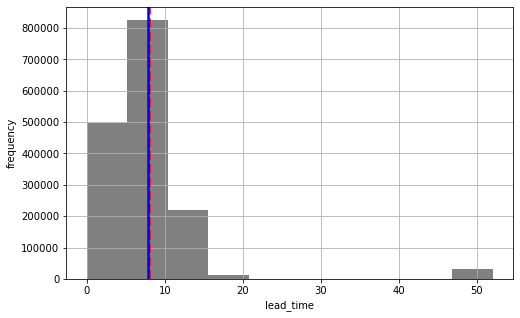

In [38]:
# Calculate mean and median of lead time of train dataset
print("Median of lead_time : ",training_data.lead_time.median())
print("Mean of lead_time : ",training_data.lead_time.mean())
print()

plt.figure(1,figsize=(8,5))
plt.xlabel("lead_time")
plt.ylabel("frequency")
# To show lead time on histogram
training_data.lead_time.hist(color='grey')
# Add a vertical red line for median of lead_time across the axes. 
plt.axvline(training_data.lead_time.median(), color="red", linestyle='dashed', linewidth=2.5) 
# Add a vertical blue line for mean of lead_time across the axes. 
plt.axvline(training_data.lead_time.mean(), color="blue", linewidth=2.5)
plt.show()

 * According to above histogram lead_time is right-skewed. Most lead time fall in the range 0-20 and a small proportion is 
   close to 50. We can replace NaNs to median because the unknown lead time are likely to fall in the same range. 

In [39]:
# Filling missing values with median of lead_time
training_data.lead_time = training_data.lead_time.fillna(training_data.lead_time.median())
test_data.lead_time = test_data.lead_time.fillna(test_data.lead_time.median())

Median of perf_6_month_avg :  0.85
Mean of perf_6_month_avg :  0.7823811940800672


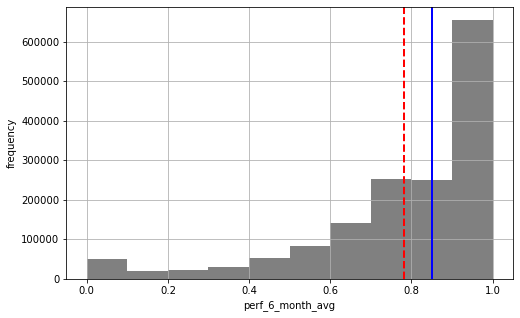

In [40]:
# Calculate mean and median of perf_6_month_avg of train dataset
print("Median of perf_6_month_avg : ", training_data.perf_6_month_avg.median())
print("Mean of perf_6_month_avg : ", training_data.perf_6_month_avg.mean())

plt.figure(2,figsize=(8,5))
plt.xlabel("perf_6_month_avg")
plt.ylabel("frequency")
# To show perf_6_month_avg on histogram
training_data.perf_6_month_avg.hist(color='grey')
# Add a vertical red line for median of perf_6_month_avg across the axes. 
plt.axvline(training_data.perf_6_month_avg.median(), 
            color="blue", 
            linewidth=2.0)
# Add a vertical blue line for mean of perf_6_month_avg across the axes. 
plt.axvline(training_data.perf_6_month_avg.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()


Median of perf_12_month_avg :  0.83
Mean of perf_12_month_avg :  0.7769762678715476


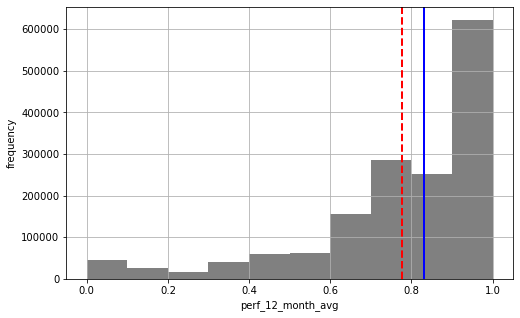

In [41]:
# Calculate mean and median of lead time of train dataset
print("Median of perf_12_month_avg : ", training_data.perf_12_month_avg.median())
print("Mean of perf_12_month_avg : ", training_data.perf_12_month_avg.mean())

plt.figure(3,figsize=(8,5))
plt.xlabel("perf_12_month_avg")
plt.ylabel("frequency")
# To show perf_12_month_avg on histogram
training_data.perf_12_month_avg.hist(color='grey')
# Add a vertical red line for median of perf_12_month_avg across the axes. 
plt.axvline(training_data.perf_12_month_avg.median(), 
            color="blue", 
            linewidth=2.0)
# Add a vertical blue line for mean of perf_12_month_avg across the axes. 
plt.axvline(training_data.perf_12_month_avg.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()

In [42]:
# perf_6_month_avg and perf_12_month_avg both are left skewed. We can fill missing values with median. 
training_data.perf_6_month_avg = training_data.perf_6_month_avg.fillna(training_data.perf_6_month_avg.median())
training_data.perf_12_month_avg = training_data.perf_12_month_avg.fillna(training_data.perf_12_month_avg.median())

test_data.perf_6_month_avg = test_data.perf_6_month_avg.fillna(test_data.perf_6_month_avg.median())
test_data.perf_12_month_avg = test_data.perf_12_month_avg.fillna(test_data.perf_12_month_avg.median())

In [43]:
training_data[float_columns].isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
dtype: int64

##### Analyse target variable 'went_on_backorder'

In [44]:
#" It's a binary classification problem as there are only two values for the target ''went_on_backorder" column¶

In [45]:
# Checking the target variable of train dataset, how many time order went to backorder
print("Items not on backorder :", training_data.went_on_backorder.value_counts()[0])
print("Items on backorder :", training_data.went_on_backorder.value_counts()[1])

Items not on backorder : 1676567
Items on backorder : 11293


Proportion of items not on backorder : 99.33092792056213%
Proportion of items on backorder : 0.6690720794378681%



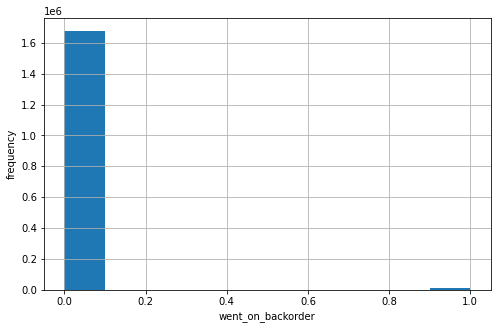

In [46]:
# Percentage of item on backorder and not on backorder
print("Proportion of items not on backorder : {}%".format((training_data.went_on_backorder.value_counts()[0]/len(training_data.went_on_backorder))*100))
print("Proportion of items on backorder : {}%".format((training_data.went_on_backorder.value_counts()[1]/len(training_data.went_on_backorder))*100))
print()

plt.figure(4,figsize=(8,5))
plt.xlabel("went_on_backorder")
plt.ylabel("frequency")
# To show went_on_backorder on histogram
training_data.went_on_backorder.hist()
plt.show()


In [47]:
# Checking the target variable of test dataset, how many time order went to backorder
print("Items not on backorder :", test_data.went_on_backorder.value_counts()[0])
print("Items on backorder :", test_data.went_on_backorder.value_counts()[1])

Items not on backorder : 239387
Items on backorder : 2688


Proportion of items not on backorder : 98.88960033047609%
Proportion of items on backorder : 1.110399669523908%



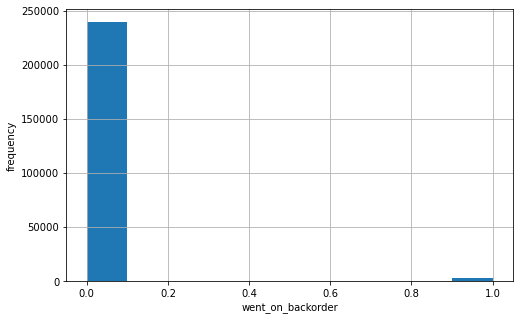

In [48]:
# Percentage of item on backorder and not on backorder
print("Proportion of items not on backorder : {}%".format((test_data.went_on_backorder.value_counts()[0]/len(test_data.went_on_backorder))*100))
print("Proportion of items on backorder : {}%".format((test_data.went_on_backorder.value_counts()[1]/len(test_data.went_on_backorder))*100))
print()

plt.figure(4,figsize=(8,5))
plt.xlabel("went_on_backorder")
plt.ylabel("frequency")
# To show went_on_backorder on histogram
test_data.went_on_backorder.hist()
plt.show()

In [49]:
training_data.corr().round(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.00,0.00,0.10,0.08,0.08,0.08,0.15,0.19,0.23,0.24,...,0.03,0.00,0.00,0.01,-0.01,0.00,-0.00,-0.00,-0.00,-0.00
lead_time,0.00,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.00,-0.01,-0.00,-0.00,0.13,-0.00,0.01,-0.24,0.00,-0.02
in_transit_qty,0.10,-0.01,1.00,0.66,0.69,0.68,0.62,0.70,0.69,0.66,...,0.17,0.00,0.00,0.07,-0.02,0.00,-0.00,-0.00,0.00,-0.00
forecast_3_month,0.08,-0.01,0.66,1.00,0.99,0.98,0.68,0.78,0.84,0.83,...,0.36,0.01,0.00,0.04,-0.02,0.00,-0.00,0.00,0.00,-0.00
forecast_6_month,0.08,-0.01,0.69,0.99,1.00,0.99,0.70,0.81,0.87,0.86,...,0.36,0.01,0.00,0.04,-0.02,0.00,-0.00,0.00,-0.00,-0.00
forecast_9_month,0.08,-0.01,0.68,0.98,0.99,1.00,0.72,0.83,0.89,0.88,...,0.37,0.01,0.00,0.04,-0.02,0.00,-0.00,0.00,-0.00,-0.00
sales_1_month,0.15,-0.01,0.62,0.68,0.70,0.72,1.00,0.92,0.87,0.82,...,0.25,0.01,0.00,0.07,-0.01,0.00,-0.00,-0.00,-0.00,-0.00
sales_3_month,0.19,-0.01,0.70,0.78,0.81,0.83,0.92,1.00,0.98,0.93,...,0.30,0.01,0.00,0.07,-0.02,0.00,-0.00,-0.00,-0.00,-0.00
sales_6_month,0.23,-0.01,0.69,0.84,0.87,0.89,0.87,0.98,1.00,0.97,...,0.32,0.01,0.00,0.06,-0.02,0.00,-0.00,-0.00,-0.00,-0.00
sales_9_month,0.24,-0.01,0.66,0.83,0.86,0.88,0.82,0.93,0.97,1.00,...,0.32,0.01,0.00,0.05,-0.02,0.00,-0.00,-0.00,-0.00,-0.00


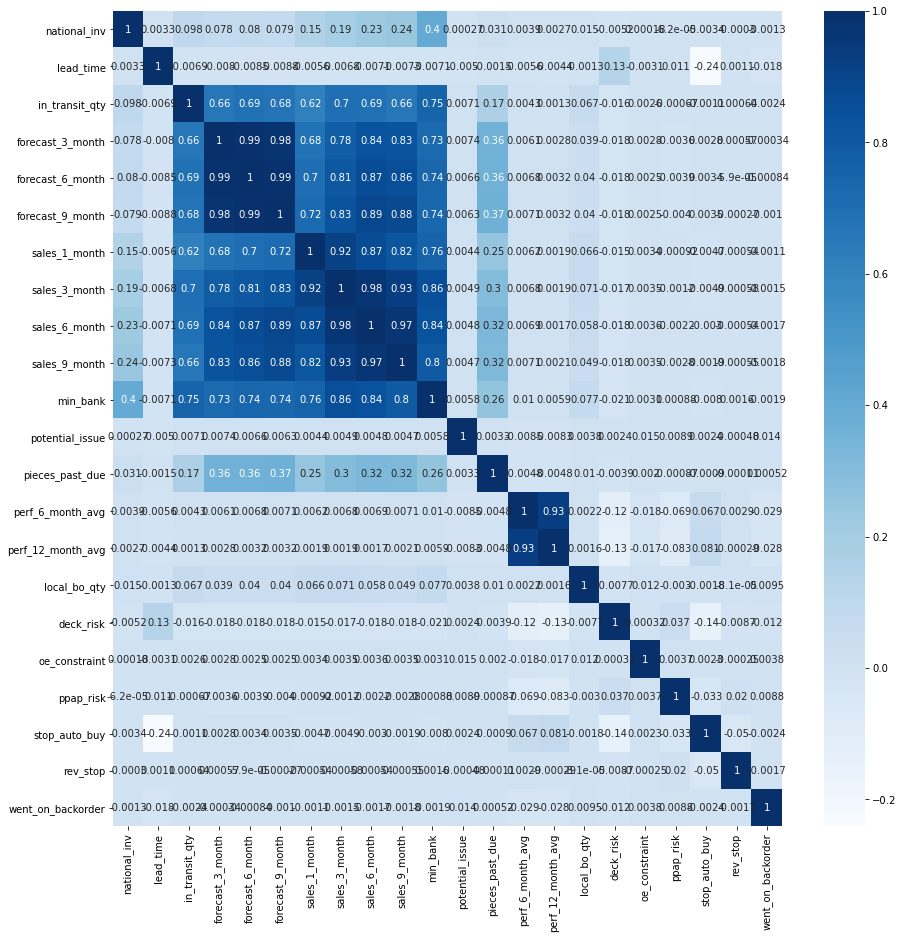

In [50]:
# Visualizing correlation on heat map
plt.figure(figsize=(15,15))
corr = training_data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

The correlation matrix shows that the quantity in transit, the forecast sales over 3/6/9 months, the actual sales over the previous 1/3/6/9 months, and minimum recommended stock level are highly correlated. 

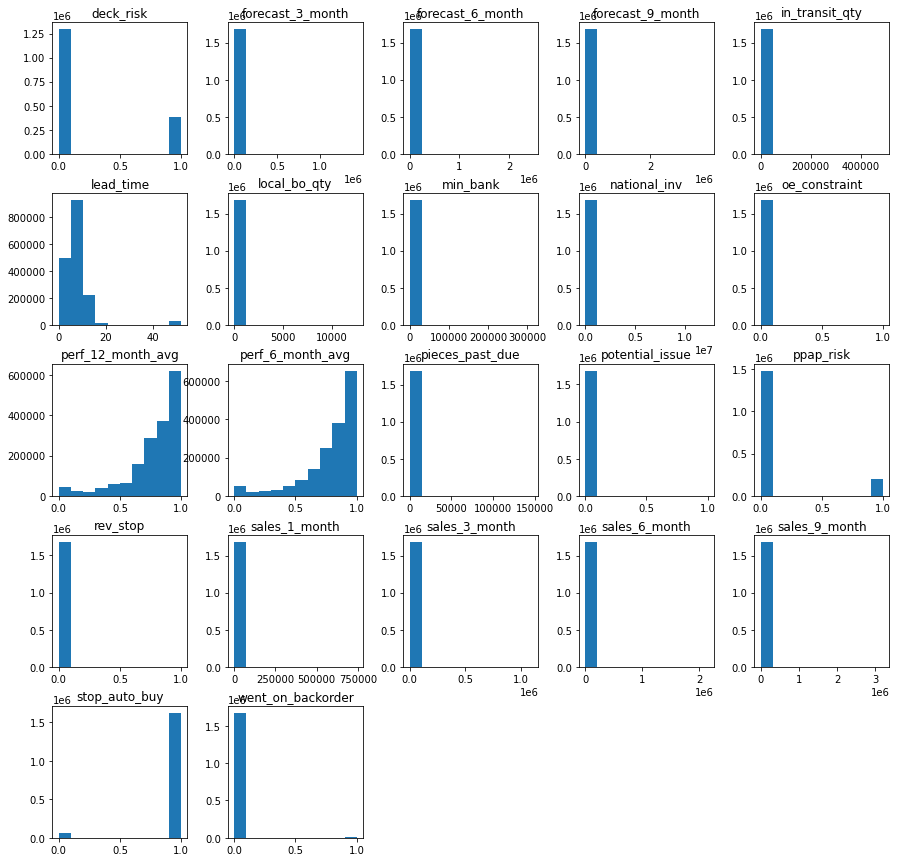

In [51]:
# Look at each column data
training_data.hist(figsize=(15,15), grid=False)
plt.show()

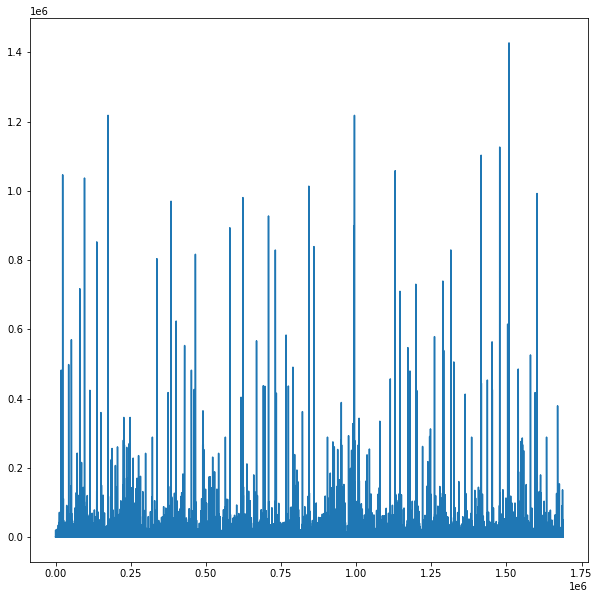

In [52]:
# To look colser at forecast_3_month data using line graph
training_data['forecast_3_month'].plot(figsize=(10,10), kind='line')

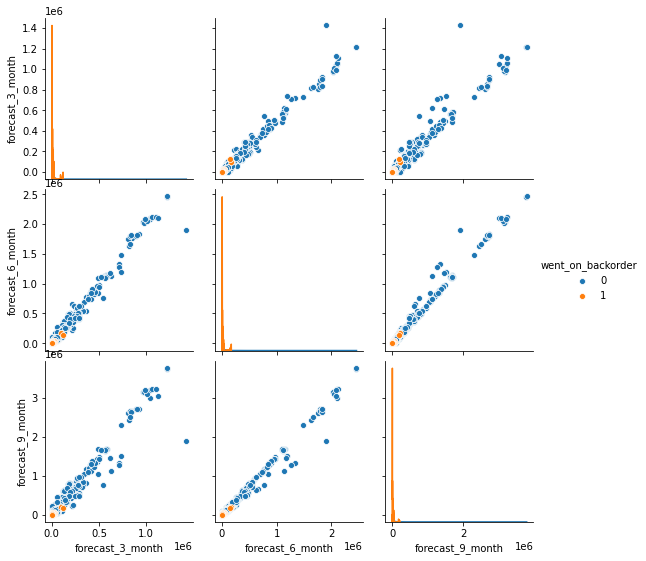

In [53]:
# Closer look at correlation with scatter plot
# All forecast columns
forecasts= ['forecast_3_month','forecast_6_month', 'forecast_9_month']
#Plotting pair-wise scatter plot for forecast with distribution on basis of 'went_on_backorder'
sns.pairplot(training_data, vars=forecasts, hue='went_on_backorder')

In train dataset, forecast sales for the next months are making linear correlation with each other, as expected from the correlation matrix and forecast values cover a wide rang from 0 to 1 millian. Above showing that item went on backorder, means 'went_on_backorder' is 'yes'(or 1) when the forecast values are low.

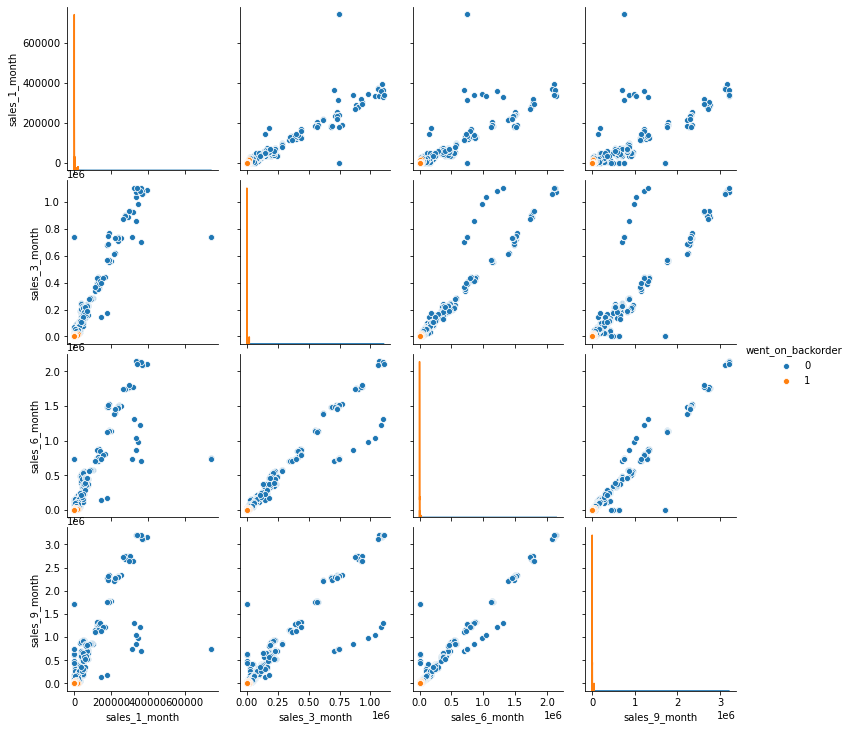

In [54]:
# Closer look at correlation with scatter plot
# All forecast columns
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
#Plotting pair-wise scatter plot for forecast with distribution on basis of 'went_on_backorder'
sns.pairplot(training_data, vars=sales, hue='went_on_backorder')

In train dataset, sales month for the last months are also making linear correlation with each other, as expected from the correlation matrix and sales values cover a wide rang from 0 to 1 millian. There are ouliers. Item went on backorder, means 'went_on_backorder' is 'yes'(or 1) when the sales values were low.